In [2]:
# Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from time import time
from operator import itemgetter
from sklearn import metrics

In [3]:
# Reading the data into data frame df
df=pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df = df.drop(columns = ['PassengerId','Ticket','Name','Cabin','Embarked'])

In [7]:

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
df.isnull().values.sum()

177

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [10]:
#age has many null

def removenullfromAge(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df
df=removenullfromAge(df)

In [11]:
df.isnull().values.sum()

0

In [12]:
bins = (-1, 0, 8, 15, 31, 1000)
group_names = ['Unknown', 'Low_Fare', 'Med_fare', 'High_Fare', 'Very_High_Fare']
categories = pd.cut(df.Fare, bins, labels=group_names)
df.Fare = categories

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,Student,1,0,Low_Fare
1,1,1,female,Adult,1,0,Very_High_Fare
2,1,3,female,Young Adult,0,0,Low_Fare
3,1,1,female,Young Adult,1,0,Very_High_Fare
4,0,3,male,Young Adult,0,0,Med_fare


In [14]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [15]:
df['Sex'],uniq = pd.factorize(df['Sex'])
df['Fare'],uniq = pd.factorize(df['Fare'])
df['Age'],uniq = pd.factorize(df['Age'])

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,0,1,0,0
1,1,1,1,1,1,0,1
2,1,3,1,2,0,0,0
3,1,1,1,2,1,0,1
4,0,3,0,2,0,0,2


In [17]:
y=df['Survived']
X=df.drop('Survived',axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234)

In [19]:
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.best_params_
    return top_params

In [20]:
param_grid_dt={'criterion':['gini','entropy'],
              'min_samples_split':[5,10,20,30,40],
              'max_depth':[2,3,5,7,9,15,20],
              'min_samples_leaf':[1,5,10,20,25,30]}

In [21]:
model_dt=DecisionTreeClassifier()

In [22]:
top_para=GridSearch_BestParam(X_train,y_train,model_dt,param_grid_dt,cv=10)

In [23]:
print(top_para)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [24]:
best_dt=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=5,min_samples_split=5)

In [25]:
best_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
best_dt.score(X_train,y_train)

0.8459069020866774

In [27]:
y_pred = best_dt.predict(X_test)

In [28]:
print(metrics.accuracy_score(y_test,y_pred))

0.8432835820895522


In [29]:
from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.84      0.93      0.88       166
          1       0.86      0.71      0.77       102

avg / total       0.84      0.84      0.84       268



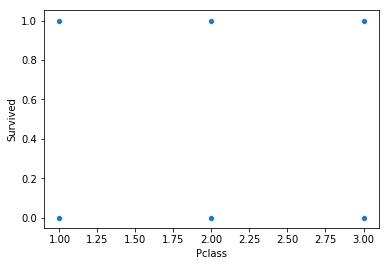

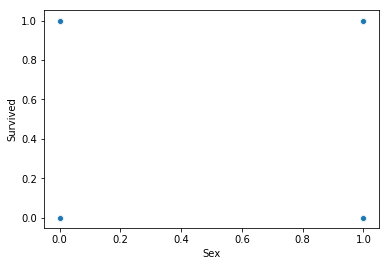

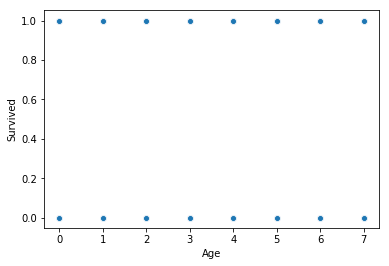

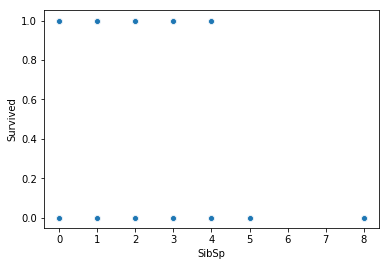

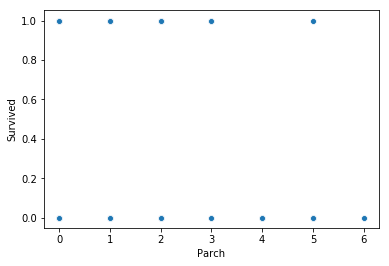

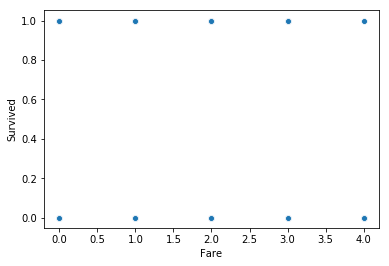

In [29]:
inde_col=['Pclass','Sex','Age','SibSp','Parch','Fare']

for i,col in enumerate(inde_col):
    plt.figure(i)
    sns.scatterplot(x=col, y="Survived", data=df)